<a href="https://colab.research.google.com/github/Gingerhouse/MLSurvivalAnalysis/blob/main/simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.overleaf.com/5942564154hxfrgqdshprs#b5f506


In [ ]:
#!pip install scikit-survival

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 20.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder

from sksurv.datasets import load_veterans_lung_cancer, load_whas500
from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sksurv.metrics import as_concordance_index_ipcw_scorer, as_cumulative_dynamic_auc_scorer, as_integrated_brier_score_scorer, cumulative_dynamic_auc, integrated_brier_score, concordance_index_ipcw
from sksurv.nonparametric import kaplan_meier_estimator, nelson_aalen_estimator
from sksurv.functions import StepFunction
from sksurv.util import Surv
from sksurv.tree import SurvivalTree
from sksurv.ensemble import RandomSurvivalForest

# Package

In [ ]:
x, y = load_veterans_lung_cancer()
x2 = OneHotEncoder().fit_transform(x)
x

,Age_in_years,Celltype,Karnofsky_score,Months_from_Diagnosis,Prior_therapy,Treatment
0,69.0,squamous,60.0,7.0,no,standard
1,64.0,squamous,70.0,5.0,yes,standard
2,38.0,squamous,60.0,3.0,no,standard
3,63.0,squamous,60.0,9.0,yes,standard
4,65.0,squamous,70.0,11.0,yes,standard
...,...,...,...,...,...,...
132,65.0,large,75.0,1.0,no,test
133,64.0,large,60.0,5.0,no,test
134,67.0,large,70.0,18.0,yes,test
135,65.0,large,80.0,4.0,no,test


In [ ]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
Age_in_years,137.0,58.306569,10.541628,34.0,51.0,62.0,66.0,81.0
Karnofsky_score,137.0,58.569343,20.039592,10.0,40.0,60.0,75.0,99.0
Months_from_Diagnosis,137.0,8.773723,10.612141,1.0,3.0,5.0,11.0,87.0


In [ ]:
np.linspace(5, 81, 15)

array([ 5.        , 10.42857143, 15.85714286, 21.28571429, 26.71428571,
       32.14285714, 37.57142857, 43.        , 48.42857143, 53.85714286,
       59.28571429, 64.71428571, 70.14285714, 75.57142857, 81.        ])

In [ ]:
np.arange(8, 184, 7)

array([  8,  15,  22,  29,  36,  43,  50,  57,  64,  71,  78,  85,  92,
        99, 106, 113, 120, 127, 134, 141, 148, 155, 162, 169, 176, 183])

In [ ]:
y

array([( True,  72.), ( True, 411.), ( True, 228.), ( True, 126.),
       ( True, 118.), ( True,  10.), ( True,  82.), ( True, 110.),
       ( True, 314.), (False, 100.), ( True,  42.), ( True,   8.),
       ( True, 144.), (False,  25.), ( True,  11.), ( True,  30.),
       ( True, 384.), ( True,   4.), ( True,  54.), ( True,  13.),
       (False, 123.), (False,  97.), ( True, 153.), ( True,  59.),
       ( True, 117.), ( True,  16.), ( True, 151.), ( True,  22.),
       ( True,  56.), ( True,  21.), ( True,  18.), ( True, 139.),
       ( True,  20.), ( True,  31.), ( True,  52.), ( True, 287.),
       ( True,  18.), ( True,  51.), ( True, 122.), ( True,  27.),
       ( True,  54.), ( True,   7.), ( True,  63.), ( True, 392.),
       ( True,  10.), ( True,   8.), ( True,  92.), ( True,  35.),
       ( True, 117.), ( True, 132.), ( True,  12.), ( True, 162.),
       ( True,   3.), ( True,  95.), ( True, 177.), ( True, 162.),
       ( True, 216.), ( True, 553.), ( True, 278.), ( True,  1

In [ ]:
pd.DataFrame.from_records(y)

,Status,Survival_in_days
0,True,72.0
1,True,411.0
2,True,228.0
3,True,126.0
4,True,118.0
...,...,...
132,True,133.0
133,True,111.0
134,True,231.0
135,True,378.0


In [ ]:
# mod = CoxPHSurvivalAnalysis().fit(x2, y)
#pd.Series(mod.coef_, index=x2.columns)

In [ ]:
# mod.score(x2, y)

In [ ]:
X, y = load_whas500()
y

array([(False, 2.178e+03), (False, 2.172e+03), (False, 2.190e+03),
       ( True, 2.970e+02), (False, 2.131e+03), ( True, 1.000e+00),
       (False, 2.122e+03), ( True, 1.496e+03), ( True, 9.200e+02),
       (False, 2.175e+03), (False, 2.173e+03), ( True, 1.671e+03),
       (False, 2.192e+03), ( True, 8.650e+02), (False, 2.166e+03),
       (False, 2.168e+03), ( True, 9.050e+02), ( True, 2.353e+03),
       (False, 2.146e+03), ( True, 6.100e+01), ( True, 2.358e+03),
       (False, 2.114e+03), (False, 2.132e+03), (False, 2.139e+03),
       (False, 2.048e+03), (False, 2.152e+03), ( True, 6.000e+00),
       (False, 2.156e+03), ( True, 1.180e+02), (False, 2.064e+03),
       ( True, 8.490e+02), ( True, 7.140e+02), (False, 2.057e+03),
       ( True, 2.000e+00), ( True, 7.000e+00), (False, 2.151e+03),
       ( True, 6.000e+00), ( True, 4.220e+02), ( True, 3.540e+02),
       (False, 2.065e+03), (False, 2.048e+03), ( True, 1.065e+03),
       ( True, 5.350e+02), (False, 2.118e+03), ( True, 9.700e+

In [ ]:
y.dtype.fields

mappingproxy({'fstat': (dtype('bool'), 0), 'lenfol': (dtype('float64'), 1)})

In [ ]:
estimator = SurvivalTree().fit(X, y)
surv_funcs = estimator.predict_survival_function(X.iloc[:5])

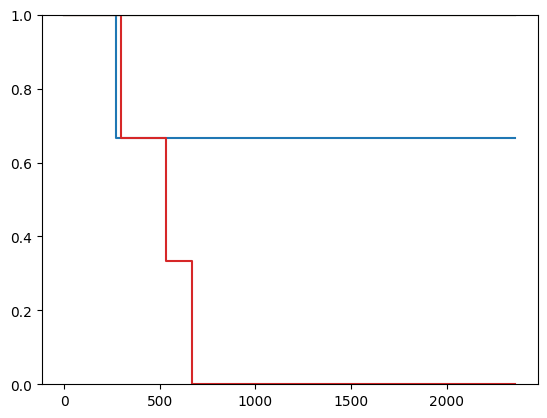

In [ ]:
for fn in surv_funcs:
  plt.step(fn.x, fn(fn.x), where="post")

plt.ylim(0, 1)
plt.show()

# Testing

In [ ]:
p = 3
mu = [0]*p
S = np.diag([1,5,10])
N = 1000
beta = np.array([0.5, -0.3, 0]) # Coefficients for covariates
tau = 5 # Maximum follow-up time for censoring

np.random.seed(42)
Z = np.random.multivariate_normal(mu, S, N)
h0 = 1 # baseline hazard
u = np.random.uniform(0, 1, N)

T = -np.log(u)*np.exp(-Z@beta)
cu = np.random.uniform(0, tau, N) # censoring time

Y = np.minimum(T, cu)
obs = (T<= cu) # censored (0,1)

df = pd.DataFrame(np.column_stack((Z,Y,obs)))
df.columns = ["Z1", "Z2", "Z3", "Y", "obs"]
df

,Z1,Z2,Z3,Y,obs
0,0.647689,-0.309168,1.570748,0.131850,1.0
1,-0.234137,-0.523583,4.816243,0.015920,1.0
2,-0.469474,1.716036,4.993909,2.853147,1.0
3,-0.465730,-1.036233,1.715726,0.028437,1.0
4,-1.724918,-4.278225,0.765152,0.389283,0.0
...,...,...,...,...,...
995,0.093372,-0.274386,-3.035933,0.214835,1.0
996,1.516394,5.392673,-3.574018,4.821766,0.0
997,-0.212209,0.161079,1.904065,0.530137,1.0
998,0.257753,0.173252,-3.010230,1.497116,0.0


In [ ]:
print(beta.shape)
print(Z.shape)
print(Y.shape)
print(obs.shape)
print(df.shape)
print(T.shape)

(3,)
(1000, 3)
(1000,)
(1000,)
(1000, 5)
(1000,)


In [ ]:
max(Y)

4.920447319832571

In [ ]:
# setting it to their format
y = Surv.from_dataframe('obs','Y',df)

mod = CoxPHSurvivalAnalysis().fit(Z, y)
mod.coef_

array([ 0.49881809, -0.29557086,  0.00628197])

Hyperparamter Tuning:

{'estimator__max_depth': 4,
 'estimator__min_samples_leaf': 25,
 'estimator__min_samples_split': 55} : -0.13121890195065214

{'estimator__max_depth': 4,
 'estimator__min_samples_leaf': 45,
 'estimator__min_samples_split': 5} : 0.6800327577635323

{'estimator__max_depth': 8,
 'estimator__min_samples_leaf': 25,
 'estimator__min_samples_split': 5} : 0.7824510663961288

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, stratify = y['obs'], random_state=0) # splitting data
mod1 = SurvivalTree(random_state = 0).fit(x_train, y_train)

low, up = np.percentile(y["Y"], [10, 90])
up = 4
t = np.arange(low, up)

cv = KFold(n_splits=5, shuffle=True, random_state=1)

params = {
    'estimator__max_depth': range(2,10),
    'estimator__min_samples_leaf': [10, 20 ,30 ,40 ,50],
}

In [ ]:
low

0.07659232156033734

In [ ]:
up

4

In [ ]:
t

array([0.07659232, 1.07659232, 2.07659232, 3.07659232])

In [ ]:
gcv_brier = GridSearchCV(
    as_integrated_brier_score_scorer(mod1, times=t),
    param_grid= params,
    cv=cv,
    n_jobs= -1,
).fit(x_train, y_train)

gcv_brier.best_params_

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'estimator__max_depth': 4, 'estimator__min_samples_leaf': 50}

In [ ]:
gcv_brier.best_score_

-0.13143648943839434

In [ ]:
gcv_ci = GridSearchCV(
    as_concordance_index_ipcw_scorer(mod1, tau=t[-1]),
    param_grid= params,
    cv=cv,
    n_jobs=-1,
).fit(x_train, y_train)

gcv_ci.best_params_

{'estimator__max_depth': 4, 'estimator__min_samples_leaf': 40}

In [ ]:
gcv_ci.best_score_

0.6804716732547794

In [ ]:
gcv_auc = GridSearchCV(
    as_cumulative_dynamic_auc_scorer(mod1, times=t),
    param_grid= params,
    cv=cv,
    n_jobs=-1,
).fit(x_train, y_train)

gcv_auc.best_params_

{'estimator__max_depth': 4, 'estimator__min_samples_leaf': 40}

In [ ]:
gcv_auc.best_score_

0.7815096050158687

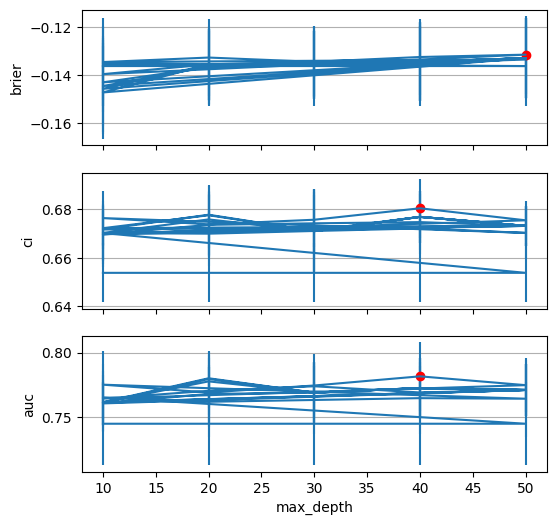

In [ ]:
def plot_grid(gcv, ax, name):
    ax.errorbar(
        x=gcv.cv_results_["param_estimator__min_samples_leaf"].filled(),
        y=gcv.cv_results_["mean_test_score"],
        yerr=gcv.cv_results_["std_test_score"],
    )
    ax.plot(
        gcv.best_params_["estimator__min_samples_leaf"],
        gcv.best_score_,
        "ro",
    )
    ax.set_ylabel(name)
    ax.yaxis.grid(True)


_, axs = plt.subplots(3, 1, figsize=(6, 6), sharex=True)
axs[-1].set_xlabel("max_depth")

plot_grid(gcv_brier, axs[0], "brier")
plot_grid(gcv_ci, axs[1], "ci")
plot_grid(gcv_auc, axs[2], "auc")

In [ ]:
st1 = SurvivalTree(max_depth = 2, min_samples_leaf = 10).fit(x_train, y_train)
st2 = SurvivalTree(max_depth = 4, min_samples_leaf = 40).fit(x_train, y_train)
st3 = SurvivalTree(max_depth = 5, min_samples_leaf = 10).fit(x_train, y_train)

st1_pred = st1.predict(x_test)
st2_pred = st2.predict(x_test)
st3_pred = st3.predict(x_test)

In [ ]:
len(set(st1_pred))

4

In [ ]:
np.unique(st1_pred)

array([ 138.80658929,  383.83963889,  554.22408182, 1222.02263083])

In [ ]:
len(set(st2_pred))

13

In [ ]:
np.unique(st2_pred)

array([  55.0627728 ,  128.58242044,  136.19974271,  324.10396967,
        364.96156699,  393.60413344,  494.53090146,  559.75780657,
        713.2288048 ,  793.05747726,  885.32795292, 1179.2799682 ,
       1480.68952433])

In [ ]:
len(set(st3_pred))

25

In [ ]:
np.unique(st3_pred)

array([   1.66666667,    3.66666667,   46.46212121,   75.02773615,
         93.70033012,  115.77371795,  174.95560814,  266.57526563,
        274.08361103,  280.52823817,  408.55021314,  521.12586316,
        545.6297619 ,  553.86805831,  554.99253247,  726.46818182,
        726.71083084,  751.7018537 ,  903.31692197,  934.22634171,
        974.29722222, 1011.69003726, 1018.08809524, 1335.37156843,
       1414.03557967])

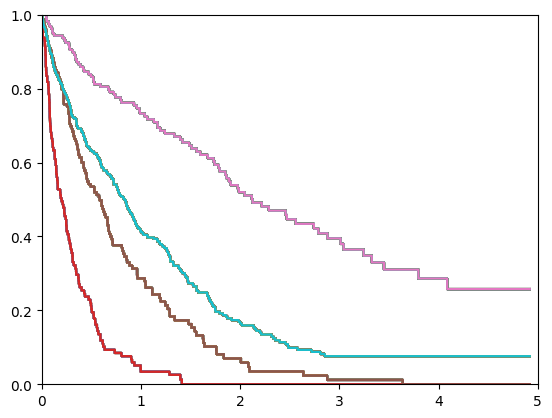

In [ ]:
# Survival Function
pred2 = st1.predict_survival_function(x_test)
for fn in pred2:
  plt.step(fn.x, fn(fn.x), where="post")
plt.ylim(0,1)
plt.xlim(0,5)
plt.show()

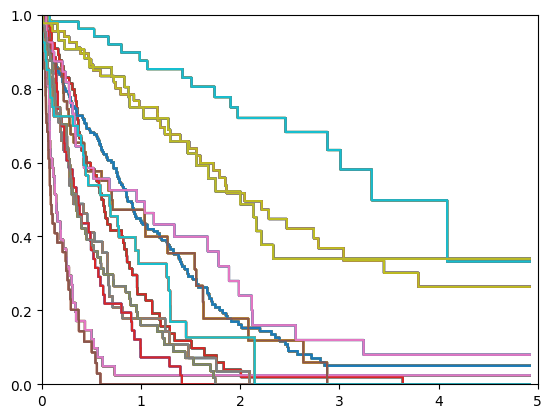

In [ ]:
# Survival Function
pred2 = st2.predict_survival_function(x_test)
for fn in pred2:
  plt.step(fn.x, fn(fn.x), where="post")
plt.ylim(0,1)
plt.xlim(0,5)
plt.show()

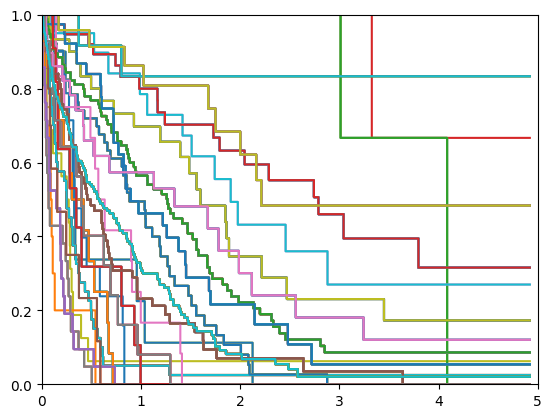

In [ ]:
# Survival Function
pred2 = st3.predict_survival_function(x_test)
for fn in pred2:
  plt.step(fn.x, fn(fn.x), where="post")
plt.ylim(0,1)
plt.xlim(0,5)
plt.show()

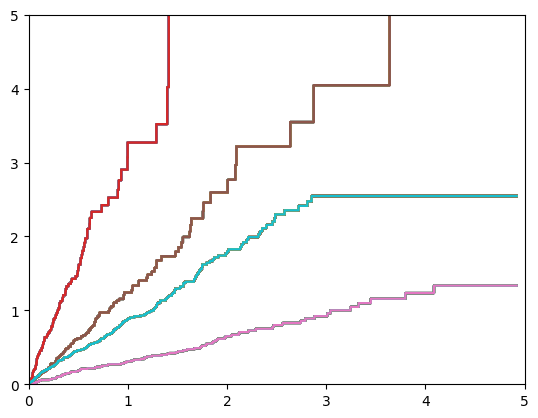

In [ ]:
# Cumulative Hazard Function
pred3 = st1.predict_cumulative_hazard_function(x_test)
for fn in pred3:
  plt.step(fn.x, fn(fn.x), where="post")
plt.ylim(0,5)
plt.xlim(0,5)
plt.show()

In [ ]:
st1.score(x_test, y_test)

0.6334026334026334

In [ ]:
st2.score(x_test, y_test)

0.6483336483336484

In [ ]:
st3.score(x_test, y_test)

0.6863226863226863

In [ ]:
t

array([0.07659232, 1.07659232, 2.07659232, 3.07659232])

In [ ]:
concordance_index_ipcw(y_train, y_test, st1_pred)

(0.6223671324576047, 7719, 3484, 4670, 0)

In [ ]:
concordance_index_ipcw(y_train, y_test, st1_pred, t[-1])

(0.6247382463099832, 7719, 3484, 4670, 0)

In [ ]:
concordance_index_ipcw(y_train, y_test, st2_pred, t[-1])

(0.6429151706861918, 9516, 4807, 1550, 0)

In [ ]:
concordance_index_ipcw(y_train, y_test, st3_pred, t[-1])

(0.6791190260187192, 10216, 4301, 1356, 0)

In [ ]:
surv1 = np.asarray([[fn(i) for i in t] for fn in st1.predict_survival_function(x_test)])
integrated_brier_score(y_train, y_test, surv1, t)

0.1422224622578498

In [ ]:
surv2 = np.asarray([[fn(i) for i in t] for fn in st2.predict_survival_function(x_test)])
integrated_brier_score(y_train, y_test, surv2, t)

0.14113903455460353

In [ ]:
surv3 = np.asarray([[fn(i) for i in t] for fn in st3.predict_survival_function(x_test)])
integrated_brier_score(y_train, y_test, surv3, t)

0.13923757486278854

In [ ]:
st1_auc, st1_mean_auc = cumulative_dynamic_auc(y_train, y_test, st1_pred, t)
print(st1_auc)
print(st1_mean_auc)

[0.59629315 0.69239585 0.6244069  0.73920665]
0.6760196080049695


In [ ]:
st2_auc, st2_mean_auc = cumulative_dynamic_auc(y_train, y_test, st2_pred, t)
print(st2_auc)
print(st2_mean_auc)

[0.59248268 0.71286345 0.71642453 0.79105608]
0.7087002514917955


In [ ]:
st3_auc, st3_mean_auc = cumulative_dynamic_auc(y_train, y_test, st3_pred, t)
print(st3_auc)
print(st3_mean_auc)

[0.65259042 0.77446637 0.72099994 0.82465778]
0.7587435888744308


(0.5, 0.9)

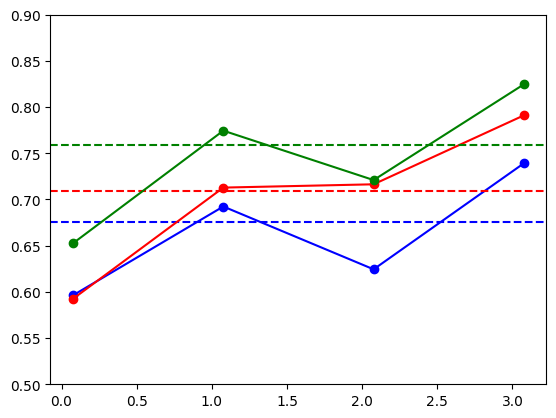

In [ ]:
plt.plot(t, st1_auc, marker = 'o', color = 'b')
plt.axhline(st1_mean_auc, linestyle="--", color = 'b')

plt.plot(t, st2_auc, marker = 'o', color = 'r')
plt.axhline(st2_mean_auc, linestyle="--", color = 'r')

plt.plot(t, st3_auc, marker = 'o', color = 'g')
plt.axhline(st3_mean_auc, linestyle="--", color = 'g')

plt.ylim(0.5,0.9)

In [ ]:
t

array([0.07659232, 1.07659232, 2.07659232, 3.07659232])

# Random Forest

In [ ]:
import time
mod2 = RandomSurvivalForest(random_state = 0, n_jobs = -1).fit(x_train, y_train)

params = {
    'estimator__max_depth': range(2,8),
}

In [ ]:
start_time = time.time()

gcv_brier = RandomizedSearchCV(
    as_integrated_brier_score_scorer(mod2, times=t),
    param_distributions= params,
    cv=cv,
    n_jobs = 1
).fit(x_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 63.87326979637146 seconds ---


In [ ]:
print(gcv_brier.best_params_)
print(gcv_brier.best_score_)

{'estimator__max_depth': 6}
-0.1285931105862798


In [ ]:
start_time = time.time()

gcv_ci = RandomizedSearchCV(
    as_concordance_index_ipcw_scorer(mod2, tau=t[-1]),
    param_distributions= params,
    cv=cv,
    n_jobs=1,
).fit(x_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


--- 38.23978018760681 seconds ---


In [ ]:
print(gcv_ci.best_params_)
print(gcv_ci.best_score_)

{'estimator__max_depth': 5}
0.6944893927296064


In [ ]:
gcv_auc = RandomizedSearchCV(
    as_cumulative_dynamic_auc_scorer(mod2, times=t),
    param_distributions= params,
    cv=cv,
    n_jobs=1,
).fit(x_train, y_train)

gcv_auc.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'estimator__max_depth': 5}

In [ ]:
gcv_auc.best_score_

0.7975267240155833

In [ ]:
rsf = RandomSurvivalForest(max_depth = 5, n_jobs = -1).fit(x_train, y_train)
pred4 = rsf.predict(x_test)

In [ ]:
len(set(pred4))

200

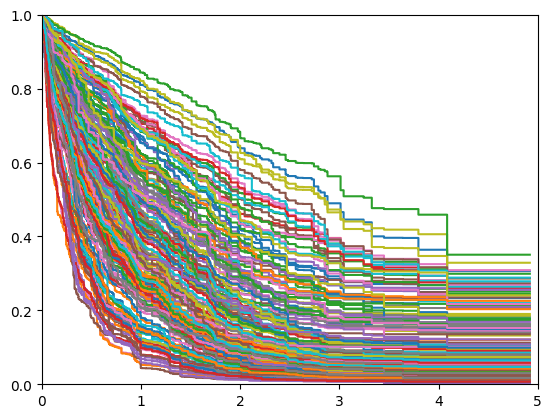

In [ ]:
# Survival Function
pred2 = rsf.predict_survival_function(x_test)
for fn in pred2:
  plt.step(fn.x, fn(fn.x), where="post")
plt.ylim(0,1)
plt.xlim(0,5)
plt.show()

In [ ]:
rsf.score(x_test, y_test)

0.6905436905436906

# Neural Networks

In [ ]:
y_train2 = pd.DataFrame(y_train, columns=['status', 'Y'])
y_test2 = pd.DataFrame(y_test, columns=['status', 'Y'])

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork(nn.Module):
  def __init__(self, in_features, out_features):
        super(NeuralNetwork, self).__init__()
        torch.nn.Linear(in_features, 32),
        torch.nn.ReLU(),
        torch.nn.BatchNorm1d(32),
        torch.nn.Dropout(0.1),

        torch.nn.Linear(32, 32),
        torch.nn.ReLU(),
        torch.nn.BatchNorm1d(32),
        torch.nn.Dropout(0.1),

        torch.nn.Linear(32, out_features)

  def forward(self, x):

        return x

def train(model, criterion, optimizer, X, y, epochs=1000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()

def cox_loss_function(log_hz, event, time):
    time_sorted, idx = torch.sort(time)
    log_hz_sorted = log_hz[idx]
    event_sorted = event[idx]
    time_unique = torch.unique(time_sorted)

    if len(time_unique) == len(time_sorted):
        pll = (log_hz_sorted - torch.logcumsumexp(log_hz_sorted.flip(0), dim=0).flip(0))[event_sorted]

    pll = torch.neg(pll)

    return loss

In [ ]:
# nn_pred =

In [ ]:
# concordance_index_ipcw(y_test['Status'], y_test['Survival_in_days'], nn_pred)

# SVMs

In [ ]:
from sksurv.svm import HingeLossSurvivalSVM, FastKernelSurvivalSVM, FastSurvivalSVM, MinlipSurvivalAnalysis, NaiveSurvivalSVM
from sksurv.kernels import clinical_kernel

hlsvm = HingeLossSurvivalSVM()
fksvm = FastKernelSurvivalSVM(optimizer="rbtree", kernel="precomputed", random_state=0)
fsvm = FastSurvivalSVM(max_iter=1000, tol=1e-5, random_state=0)
nsvm = NaiveSurvivalSVM(tol=1e-5, random_state=0)

param_grid = {"alpha": 2.0**np.arange(-2, 2, 1)}

In [ ]:
def scoring(mod, x, y):
    return concordance_index_ipcw(y["obs"], y["Y"], mod.predict(x))[0]

gcv_hlsvm = GridSearchCV(hlsvm,
                         param_grid,
                         scoring = scoring,
                         n_jobs=-1,
                         cv=cv).fit(x_train, y_train)

In [ ]:
print(gcv_hlsvm.best_params_)
print(gcv_hlsvm.best_score_)

In [ ]:
gcv_fsvm = GridSearchCV(fsvm,
                        param_grid,
                        scoring = scoring,
                        n_jobs=-1,
                        cv=cv).fit(x_train, y_train)

In [ ]:
print(gcv_fsvm.best_params_)
print(gcv_fsvm.best_score_)

In [ ]:
gcv_fksvm = GridSearchCV(fksvm,
                         param_grid,
                         scoring = scoring,
                         n_jobs=-1,
                         refit=False,
                         cv=cv).fit(clinical_kernel(x_train), y_train)

In [ ]:
print(gcv_fksvm.best_params_)
print(gcv_fksvm.best_score_)

In [ ]:
gcv_nsvm = GridSearchCV(nsvm,
                        param_grid,
                        scoring = scoring,
                        n_jobs=-1,
                        cv=cv).fit(x_train, y_train)

In [ ]:
print(gcv_nsvm.best_params_)
print(gcv_nsvm.best_score_)

# Plotting Tree

In [ ]:
"""
This module defines export functions for survival trees.

It is based on the sklearn.tree.export module.
"""

# Authors: Gilles Louppe <g.louppe@gmail.com>
#          Peter Prettenhofer <peter.prettenhofer@gmail.com>
#          Brian Holt <bdholt1@gmail.com>
#          Noel Dawe <noel@dawe.me>
#          Satrajit Gosh <satrajit.ghosh@gmail.com>
#          Trevor Stephens <trev.stephens@gmail.com>
#          Li Li <aiki.nogard@gmail.com>
#          Giuseppe Vettigli <vettigli@gmail.com>
# License: BSD 3 clause
import warnings

from numbers import Integral

import numpy as np

from sklearn.tree import _criterion
from sklearn.tree import _tree
from sklearn.tree._reingold_tilford import buchheim, Tree
from sklearn.tree import DecisionTreeClassifier
from sksurv.tree import SurvivalTree
from sksurv.tree._criterion import LogrankCriterion


def _color_brew(n):
    """Generate n colors with equally spaced hues.

    Parameters
    ----------
    n : int
        The number of colors required.

    Returns
    -------
    color_list : list, length n
        List of n tuples of form (R, G, B) being the components of each color.
    """
    color_list = []

    # Initialize saturation & value; calculate chroma & value shift
    s, v = 0.75, 0.9
    c = s * v
    m = v - c

    for h in np.arange(25, 385, 360. / n).astype(int):
        # Calculate some intermediate values
        h_bar = h / 60.
        x = c * (1 - abs((h_bar % 2) - 1))
        # Initialize RGB with same hue & chroma as our color
        rgb = [(c, x, 0),
               (x, c, 0),
               (0, c, x),
               (0, x, c),
               (x, 0, c),
               (c, 0, x),
               (c, x, 0)]
        r, g, b = rgb[int(h_bar)]
        # Shift the initial RGB values to match value and store
        rgb = [(int(255 * (r + m))),
               (int(255 * (g + m))),
               (int(255 * (b + m)))]
        color_list.append(rgb)

    return color_list


def plot_tree(decision_tree, max_depth=None, feature_names=None,
              class_names=None, label='all', filled=False,
              impurity=True, node_ids=False,
              proportion=False, rotate=False, rounded=False,
              precision=3, ax=None, fontsize=None):
    """Plot a decision tree.

    The sample counts that are shown are weighted with any sample_weights that
    might be present.
    This function requires matplotlib, and works best with matplotlib >= 1.5.

    The visualization is fit automatically to the size of the axis.
    Use the ``figsize`` or ``dpi`` arguments of ``plt.figure``  to control
    the size of the rendering.

    Read more in the :ref:`User Guide <tree>`.

    .. versionadded:: 0.21

    Parameters
    ----------
    decision_tree : decision tree regressor or classifier
        The decision tree to be exported to GraphViz.

    max_depth : int, optional (default=None)
        The maximum depth of the representation. If None, the tree is fully
        generated.

    feature_names : list of strings, optional (default=None)
        Names of each of the features.

    class_names : list of strings, bool or None, optional (default=None)
        Names of each of the target classes in ascending numerical order.
        Only relevant for classification and not supported for multi-output.
        If ``True``, shows a symbolic representation of the class name.

    label : {'all', 'root', 'none'}, optional (default='all')
        Whether to show informative labels for impurity, etc.
        Options include 'all' to show at every node, 'root' to show only at
        the top root node, or 'none' to not show at any node.

    filled : bool, optional (default=False)
        When set to ``True``, paint nodes to indicate majority class for
        classification, extremity of values for regression, or purity of node
        for multi-output.

    impurity : bool, optional (default=True)
        When set to ``True``, show the impurity at each node.

    node_ids : bool, optional (default=False)
        When set to ``True``, show the ID number on each node.

    proportion : bool, optional (default=False)
        When set to ``True``, change the display of 'values' and/or 'samples'
        to be proportions and percentages respectively.

    rotate : bool, optional (default=False)
        When set to ``True``, orient tree left to right rather than top-down.

    rounded : bool, optional (default=False)
        When set to ``True``, draw node boxes with rounded corners and use
        Helvetica fonts instead of Times-Roman.

    precision : int, optional (default=3)
        Number of digits of precision for floating point in the values of
        impurity, threshold and value attributes of each node.

    ax : matplotlib axis, optional (default=None)
        Axes to plot to. If None, use current axis. Any previous content
        is cleared.

    fontsize : int, optional (default=None)
        Size of text font. If None, determined automatically to fit figure.

    Returns
    -------
    annotations : list of artists
        List containing the artists for the annotation boxes making up the
        tree.

    Examples
    --------
    >>> from sklearn.datasets import load_iris
    >>> from sklearn import tree

    >>> clf = tree.DecisionTreeClassifier(random_state=0)
    >>> iris = load_iris()

    >>> clf = clf.fit(iris.data, iris.target)
    >>> tree.plot_tree(clf)  # doctest: +SKIP
    [Text(251.5,345.217,'X[3] <= 0.8...

    """
    exporter = _MPLTreeExporter(
        max_depth=max_depth, feature_names=feature_names,
        class_names=class_names, label=label, filled=filled,
        impurity=impurity, node_ids=node_ids,
        proportion=proportion, rotate=rotate, rounded=rounded,
        precision=precision, fontsize=fontsize)
    return exporter.export(decision_tree, ax=ax)


class _BaseTreeExporter(object):
    def __init__(self, max_depth=None, feature_names=None,
                 class_names=None, label='all', filled=False,
                 impurity=True, node_ids=False,
                 proportion=False, rotate=False, rounded=False,
                 precision=3, fontsize=None):
        self.max_depth = max_depth
        self.feature_names = feature_names
        self.class_names = class_names
        self.label = label
        self.filled = filled
        self.impurity = impurity
        self.node_ids = node_ids
        self.proportion = proportion
        self.rotate = rotate
        self.rounded = rounded
        self.precision = precision
        self.fontsize = fontsize

    def get_color(self, value):
        # Find the appropriate color & intensity for a node
        if self.colors['bounds'] is None:
            # Classification tree
            color = list(self.colors['rgb'][np.argmax(value)])
            sorted_values = sorted(value, reverse=True)
            if len(sorted_values) == 1:
                alpha = 0
            else:
                alpha = ((sorted_values[0] - sorted_values[1])
                         / (1 - sorted_values[1]))
        else:
            # Regression tree or multi-output
            color = list(self.colors['rgb'][0])
            alpha = ((value - self.colors['bounds'][0]) /
                     (self.colors['bounds'][1] - self.colors['bounds'][0]))
        # unpack numpy scalars
        alpha = float(alpha)
        # compute the color as alpha against white
        color = [int(round(alpha * c + (1 - alpha) * 255, 0)) for c in color]
        # Return html color code in #RRGGBB format
        return '#%2x%2x%2x' % tuple(color)

    def get_fill_color(self, tree, node_id):
        # Fetch appropriate color for node
        if 'rgb' not in self.colors:
            # Initialize colors and bounds if required
            self.colors['rgb'] = _color_brew(tree.n_classes[0])
            if tree.n_outputs != 1:
                # Find max and min impurities for multi-output
                self.colors['bounds'] = (np.min(-tree.impurity),
                                         np.max(-tree.impurity))
            elif (tree.n_classes[0] == 1 and
                  len(np.unique(tree.value)) != 1):
                # Find max and min values in leaf nodes for regression
                self.colors['bounds'] = (np.min(tree.value),
                                         np.max(tree.value))
        if tree.n_outputs == 1:
            node_val = (tree.value[node_id][0, :] /
                        tree.weighted_n_node_samples[node_id])
            if tree.n_classes[0] == 1:
                # Regression
                node_val = tree.value[node_id][0, :]
        else:
            # If multi-output color node by impurity
            node_val = -tree.impurity[node_id]
        return self.get_color(node_val)

    def node_to_str(self, tree, node_id, criterion):
        # Generate the node content string
        if tree.n_outputs == 1:
            value = tree.value[node_id][0, :]
        else:
            value = tree.value[node_id]

        # Should labels be shown?
        labels = (self.label == 'root' and node_id == 0) or self.label == 'all'

        characters = self.characters
        node_string = characters[-1]

        # Write node ID
        if self.node_ids:
            if labels:
                node_string += 'node '
            node_string += characters[0] + str(node_id) + characters[4]

        # Write decision criteria
        if tree.children_left[node_id] != _tree.TREE_LEAF:
            # Always write node decision criteria, except for leaves
            if self.feature_names is not None:
                feature = self.feature_names[tree.feature[node_id]]
            else:
                feature = "X%s%s%s" % (characters[1],
                                       tree.feature[node_id],
                                       characters[2])
            node_string += '%s %s %s%s' % (feature,
                                           characters[3],
                                           round(tree.threshold[node_id],
                                                 self.precision),
                                           characters[4])

        # Write impurity
        if self.impurity:
            if isinstance(criterion, _criterion.FriedmanMSE):
                criterion = "friedman_mse"
            elif not isinstance(criterion, str):
                criterion = "impurity"
            if labels:
                node_string += '%s = ' % criterion
            node_string += (str(round(tree.impurity[node_id], self.precision))
                            + characters[4])

        # Write node sample count
        if labels:
            node_string += 'samples = '
        if self.proportion:
            percent = (100. * tree.n_node_samples[node_id] /
                       float(tree.n_node_samples[0]))
            node_string += (str(round(percent, 1)) + '%' +
                            characters[4])
        else:
            node_string += (str(tree.n_node_samples[node_id]) +
                            characters[4])

        # Write node class distribution / regression value
        if self.proportion and tree.n_classes[0] != 1:
            # For classification this will show the proportion of samples
            value = value / tree.weighted_n_node_samples[node_id]
        if labels:
            node_string += 'value = '
        if criterion == "logrank":
            value_text = np.array("", dtype="S32")
        elif tree.n_classes[0] == 1:
            # Regression
            value_text = np.around(value, self.precision)
        elif self.proportion:
            # Classification
            value_text = np.around(value, self.precision)
        elif np.all(np.equal(np.mod(value, 1), 0)):
            # Classification without floating-point weights
            value_text = value.astype(int)
        else:
            # Classification with floating-point weights
            value_text = np.around(value, self.precision)
        # Strip whitespace
        value_text = str(value_text.astype('S32')).replace("b'", "'")
        value_text = value_text.replace("' '", ", ").replace("'", "")
        if tree.n_classes[0] == 1 and tree.n_outputs == 1:
            value_text = value_text.replace("[", "").replace("]", "")
        value_text = value_text.replace("\n ", characters[4])
        node_string += value_text + characters[4]

        # Write node majority class
        if (self.class_names is not None and
                tree.n_classes[0] != 1 and
                tree.n_outputs == 1):
            # Only done for single-output classification trees
            if labels:
                node_string += 'class = '
            if self.class_names is not True:
                class_name = self.class_names[np.argmax(value)]
            else:
                class_name = "y%s%s%s" % (characters[1],
                                          np.argmax(value),
                                          characters[2])
            node_string += class_name

        # Clean up any trailing newlines
        if node_string.endswith(characters[4]):
            node_string = node_string[:-len(characters[4])]

        return node_string + characters[5]


class _MPLTreeExporter(_BaseTreeExporter):
    def __init__(self, max_depth=None, feature_names=None,
                 class_names=None, label='all', filled=False,
                 impurity=True, node_ids=False,
                 proportion=False, rotate=False, rounded=False,
                 precision=3, fontsize=None):

        super().__init__(
            max_depth=max_depth, feature_names=feature_names,
            class_names=class_names, label=label, filled=filled,
            impurity=impurity, node_ids=node_ids, proportion=proportion,
            rotate=rotate, rounded=rounded, precision=precision)
        self.fontsize = fontsize

        # validate
        if isinstance(precision, Integral):
            if precision < 0:
                raise ValueError("'precision' should be greater or equal to 0."
                                 " Got {} instead.".format(precision))
        else:
            raise ValueError("'precision' should be an integer. Got {}"
                             " instead.".format(type(precision)))

        # The depth of each node for plotting with 'leaf' option
        self.ranks = {'leaves': []}
        # The colors to render each node with
        self.colors = {'bounds': None}

        self.characters = ['#', '[', ']', '<=', '\n', '', '']

        self.bbox_args = dict(fc='w')
        if self.rounded:
            self.bbox_args['boxstyle'] = "round"
        else:
            # matplotlib <1.5 requires explicit boxstyle
            self.bbox_args['boxstyle'] = "square"

        self.arrow_args = dict(arrowstyle="<-")

    def _make_tree(self, node_id, et, depth=0, criterion='entropy'):
        # traverses _tree.Tree recursively, builds intermediate
        # "_reingold_tilford.Tree" object
        name = self.node_to_str(et, node_id, criterion=criterion)
        if (et.children_left[node_id] != _tree.TREE_LEAF
                and (self.max_depth is None or depth <= self.max_depth)):
            children = [self._make_tree(et.children_left[node_id], et,
                                        depth=depth + 1, criterion=criterion),
                        self._make_tree(et.children_right[node_id], et,
                                        depth=depth + 1, criterion=criterion)]
        else:
            return Tree(name, node_id)
        return Tree(name, node_id, *children)

    def export(self, decision_tree, ax=None):
        import matplotlib.pyplot as plt
        from matplotlib.text import Annotation
        if ax is None:
            ax = plt.gca()
        ax.clear()
        ax.set_axis_off()
        if isinstance(decision_tree, SurvivalTree):
            criterion = "logrank"
        else:
            criterion = decision_tree.criterion
        my_tree = self._make_tree(0, decision_tree.tree_, criterion=criterion)
        draw_tree = buchheim(my_tree)

        # important to make sure we're still
        # inside the axis after drawing the box
        # this makes sense because the width of a box
        # is about the same as the distance between boxes
        max_x, max_y = draw_tree.max_extents() + 1
        ax_width = ax.get_window_extent().width
        ax_height = ax.get_window_extent().height

        scale_x = ax_width / max_x
        scale_y = ax_height / max_y

        self.recurse(draw_tree, decision_tree.tree_, ax,
                     scale_x, scale_y, ax_height)

        anns = [ann for ann in ax.get_children()
                if isinstance(ann, Annotation)]

        # update sizes of all bboxes
        renderer = ax.figure.canvas.get_renderer()

        for ann in anns:
            ann.update_bbox_position_size(renderer)

        if self.fontsize is None:
            # get figure to data transform
            # adjust fontsize to avoid overlap
            # get max box width and height
            try:
                extents = [ann.get_bbox_patch().get_window_extent()
                           for ann in anns]
                max_width = max([extent.width for extent in extents])
                max_height = max([extent.height for extent in extents])
                # width should be around scale_x in axis coordinates
                size = anns[0].get_fontsize() * min(scale_x / max_width,
                                                    scale_y / max_height)
                for ann in anns:
                    ann.set_fontsize(size)
            except AttributeError:
                # matplotlib < 1.5
                warnings.warn("Automatic scaling of tree plots requires "
                              "matplotlib 1.5 or higher. Please specify "
                              "fontsize.")

        return anns

    def recurse(self, node, tree, ax, scale_x, scale_y, height, depth=0):
        # need to copy bbox args because matplotib <1.5 modifies them
        kwargs = dict(bbox=self.bbox_args.copy(), ha='center', va='center',
                      zorder=100 - 10 * depth, xycoords='axes pixels')

        if self.fontsize is not None:
            kwargs['fontsize'] = self.fontsize

        # offset things by .5 to center them in plot
        xy = ((node.x + .5) * scale_x, height - (node.y + .5) * scale_y)

        if self.max_depth is None or depth <= self.max_depth:
            if self.filled:
                kwargs['bbox']['fc'] = self.get_fill_color(tree,
                                                           node.tree.node_id)
            if node.parent is None:
                # root
                ax.annotate(node.tree.label, xy, **kwargs)
            else:
                xy_parent = ((node.parent.x + .5) * scale_x,
                             height - (node.parent.y + .5) * scale_y)
                kwargs["arrowprops"] = self.arrow_args
                ax.annotate(node.tree.label, xy_parent, xy, **kwargs)
            for child in node.children:
                self.recurse(child, tree, ax, scale_x, scale_y, height,
                             depth=depth + 1)

        else:
            xy_parent = ((node.parent.x + .5) * scale_x,
                         height - (node.parent.y + .5) * scale_y)
            kwargs["arrowprops"] = self.arrow_args
            kwargs['bbox']['fc'] = 'grey'
            ax.annotate("\n  (...)  \n", xy_parent, xy, **kwargs)

In [ ]:
Z_names = ['Z1', 'Z2', 'Z3']

In [ ]:
_, ax = plt.subplots(figsize=(5, 5))

plot_tree(st1,
          feature_names = Z_names,
          impurity = False,
          label = None,
          ax = ax,
          fontsize = 10)

In [ ]:
_, ax = plt.subplots(figsize=(10, 10))
plot_tree(st2,
          feature_names = Z_names,
          impurity = False,
          label = None,
          ax = ax,
          fontsize = 10)

In [ ]:
_, ax = plt.subplots(figsize=(20, 20))
plot_tree(st3,
          feature_names = Z_names,
          impurity = False,
          label = None,
          ax = ax,
          fontsize = 10)

In [ ]:
_, ax = plt.subplots(figsize=(20, 20))
plot_tree(rsf.estimators_[0],
          feature_names=Z_names,
          impurity=False,
          label="none")

In [ ]:
'''
from graphviz import Source
from sklearn.tree import export_graphviz

graph=Source(export_graphviz(st,
                             feature_names=Z_names,
                             filled=True,
                             rounded=True))

graph

from dtreeviz.trees import *

viz = dtreeviz(st, x_train, np.array([x[1] for x in y_train]), target_name='time to event',
               feature_names=x_train.iloc[:,2:].columns.tolist())
               '''

# Simulations


In [ ]:
runs = 500

p = 3
mu = [0]*p
S = np.diag([1,5,10])
N = 1000
beta = np.array([0.5, -0.3, 0]) # Coefficients for covariates
tau = 5 # Maximum follow-up time for censoring

h0 = 1 # baseline hazard

sim_coef = np.zeros(shape=(runs, 3))

for r in range(runs):
  np.random.seed(r)
  Z = np.random.multivariate_normal(mu, S, N)
  u = np.random.uniform(0, 1, N)

  T = -np.log(u)*np.exp(-Z@beta)
  cu = np.random.uniform(0, tau, N) # censoring time

  Y = np.minimum(T, cu)
  obs = (T<= cu) # censored (0,1)

  y = pd.DataFrame(np.concatenate((obs, Y)).reshape((-1, 2), order='F'))
  y[0] = y[0].astype("bool")
  y = y.to_records(index=False)

  sim_coef[r] = CoxPHSurvivalAnalysis().fit(Z, y).coef_

In [ ]:
np.mean(sim_coef, axis = 0)

array([ 0.50334641, -0.30069935,  0.0005226 ])

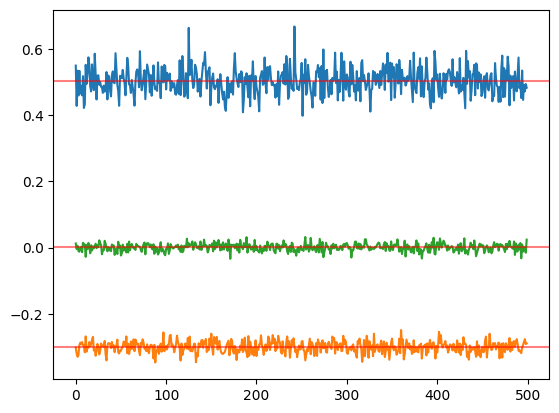

In [ ]:
plt.plot(sim_coef)
[plt.axhline(y=i, alpha = 0.5, color = 'r') for i in np.mean(sim_coef, axis = 0)]
plt.show()